***HEART ATTACK PREDICTION - ML MODEL ***
BY: Ganesh Prasath A

Data loading - dataset taken from kaggle


In [ ]:
import pandas as pd

file_path = 'heart.csv'
df = pd.read_csv(file_path)

df_info = df.info()
df_head = df.head()
df_describe = df.describe()

df_info, df_head, df_describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(None,
    age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
 0   63    1   3     145   233    1        0       150     0      2.3    0   
 1   37    1   2     130   250    0        1       187     0      3.5    0   
 2   41    0   1     130   204    0        0       172     0      1.4    2   
 3   56    1   1     120   236    0        1       178     0      0.8    2   
 4   57    0   0     120   354    0        1       163     1      0.6    2   
 
    caa  thall  output  
 0    0      1       1  
 1    0      2       1  
 2    0      2       1  
 3    0      2       1  
 4    0      2       1  ,
               age         sex          cp      trtbps        chol         fbs  \
 count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
 mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
 std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
 min     29.000000    0.000000    0.000000  

***Data analysis***

In [ ]:
missing_values_count = df.isnull().sum()
missing_values_count

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Fitting the data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop('output', axis=1)
y = df['output']

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}


model_accuracies = {}

# Train and evaluate each model
for model_name, model in models.items():

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    model_accuracies[model_name] = accuracy

model_accuracies


{'Logistic Regression': 0.8524590163934426,
 'K-Nearest Neighbors': 0.9180327868852459,
 'Support Vector Machine': 0.8688524590163934,
 'Decision Tree': 0.7540983606557377,
 'Random Forest': 0.8360655737704918}

The K-Nearest Neighbors seems to be the best model for this particular dataset. So we will be continuing with KNN.

Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Initialize KNN model
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': np.arange(1, 21),  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

best_params, best_accuracy


({'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'},
 0.842687074829932)

In [ ]:
# Initialize KNN model with default parameters
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred_default = knn_default.predict(X_test)
default_accuracy = accuracy_score(y_test, y_pred_default)

# Initialize KNN model with best parameters
knn_best = KNeighborsClassifier(metric='manhattan', n_neighbors=8, weights='distance')
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)
best_accuracy_test = accuracy_score(y_test, y_pred_best)

default_accuracy, best_accuracy_test


(0.9180327868852459, 0.8852459016393442)

Checking for overfitting and underfitting

In [ ]:
#  accuracy of the default KNN model on the training set
y_pred_train_default = knn_default.predict(X_train)
train_accuracy_default = accuracy_score(y_train, y_pred_train_default)

#  accuracy of the optimized KNN model
y_pred_train_best = knn_best.predict(X_train)
train_accuracy_best = accuracy_score(y_train, y_pred_train_best)

#  comparison of accuracy
accuracy_comparison = {
    'Model': ['Default KNN', 'Optimized KNN'],
    'Train Accuracy': [train_accuracy_default, train_accuracy_best],
    'Test Accuracy': [default_accuracy, best_accuracy_test]
}

accuracy_comparison_df = pd.DataFrame(accuracy_comparison)
accuracy_comparison_df


NameError: ignored

Parameters

In [ ]:

from sklearn.metrics import recall_score, f1_score, precision_score

#  Recall, F1 Score, and Precision for the default KNN model
recall = recall_score(y_test, y_pred_default)
f1 = f1_score(y_test, y_pred_default)
precision = precision_score(y_test, y_pred_default)

recall, f1, precision



NameError: ignored

Confusion matrix

Text(45.72222222222221, 0.5, 'True Label')

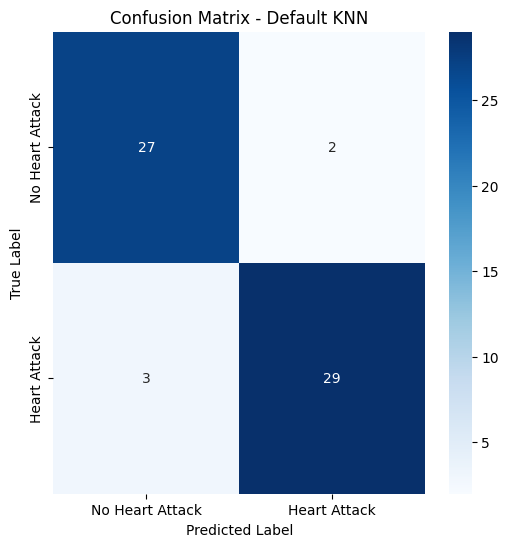

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix for the default KNN model
plt.figure(figsize=(6, 6))
conf_matrix = confusion_matrix(y_test, y_pred_default)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Attack', 'Heart Attack'],
            yticklabels=['No Heart Attack', 'Heart Attack'])
plt.title('Confusion Matrix - Default KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')



**Predicting heart attack risk for an user**

In [ ]:

def explain_risk_factors(user_input):
    explanations = []

    low_risk_ranges = {
        'age': (30, 50),
        'trtbps': (90, 120),
        'chol': (150, 200),
        'fbs': (0, 0),
        'thalachh': (140, 190),
        'oldpeak': (0, 1),
        'caa': (0, 0)
    }

    for param, (low, high) in low_risk_ranges.items():
        value = user_input.get(param)

        if value is not None and (value < low or value > high):
            explanations.append(f"- {param.upper()} is not in the ideal range.")

    return explanations

#user input
def predict_heart_attack_risk():
    user_name, user_input = get_user_input()


    for key, value in user_input.items():
        if value is None:
            user_input[key] = df[key].median()


    user_df = pd.DataFrame([user_input], columns=X.columns)

    # Normalizing
    user_scaled = scaler.transform(user_df)

    # prediction
    prediction = knn_default.predict(user_scaled)
    prediction_prob = knn_default.predict_proba(user_scaled)

    # risk percentage
    risk_percentage = prediction_prob[0][1] * 100

    result = f"{user_name}, our model predicts that you have {'a high' if prediction[0] == 1 else 'a low'} risk of experiencing a heart attack. Your risk percentage is {risk_percentage:.2f}%."

    # Explain high-risk factors
    if prediction[0] == 1:
        result += "\n\nFactors contributing to high risk:"
        risk_factors = explain_risk_factors(user_input)

        if risk_factors:
            result += "\n" + "\n".join(risk_factors)
        else:
            result += "\n- No specific factors identified (consult a healthcare provider for a comprehensive evaluation)."

    return result

# Test the function by asking for user input and making a prediction
print(predict_heart_attack_risk())
1

Please enter your name: user1
Please enter your health parameters. If you don't know a parameter, type 'unknown'.
age (Age in years (e.g., 45)): 20
sex (Sex (Male: 1, Female: 0)): 1
cp (Chest Pain Type (0-3; 0: Typical Angina, 1: Atypical Angina, etc.)): 1
trtbps (Resting Blood Pressure in mm Hg (e.g., 130)): 200
chol (Cholesterol Level in mg/dl (e.g., 250)): 250
fbs (Fasting Blood Sugar (>120 mg/dl: 1, <=120 mg/dl: 0)): 0
restecg (Resting ECG (0-2; 0: Normal, 1: ST-T wave abnormality, etc.)): 1
thalachh (Maximum Heart Rate Achieved (e.g., 160)): 170
exng (Exercise-Induced Angina (Yes: 1, No: 0)): 1
oldpeak (Oldpeak (ST depression induced by exercise; e.g., 1.5)): unknown
slp (Slope (0-2; 0: Upsloping, 1: Flat, 2: Downsloping)): 1
caa (Number of Major Vessels colored by fluoroscopy (0-4)): 2
thall (Thalassemia (0-3; 0: Normal, 1: Fixed defect, etc.)): 1
user1, our model predicts that you have a high risk of experiencing a heart attack. Your risk percentage is 80.00%.

Factors contribut

1